# [**HuberRegressor vs Ridge on dataset with strong outliers**](https://nbviewer.org/github/Franck-PepperLabs/pepper_dsia_skl_doc_fr/blob/main/docs/examples/1_1_linear_model/plot_huber_vs_ridge.ipynb)<br/>([_HuberRegressor vs Ridge on dataset with strong outliers_](https://scikit-learn.org/stable/auto_examples/linear_model/plot_huber_vs_ridge.html))

Entraînement d'un [**`Ridge`**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) et [**`HuberRegressor`**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html) sur un jeu de données contenant des valeurs aberrantes.

Cet exemple montre que les prédictions obtenues avec Ridge sont fortement influencées par les valeurs aberrantes présentes dans le jeu de données. Le régresseur Huber est moins influencé par les valeurs aberrantes, car le modèle utilise la perte linéaire pour celles-ci. À mesure que le paramètre epsilon est augmenté pour le régresseur Huber, la fonction de décision se rapproche de celle de Ridge.

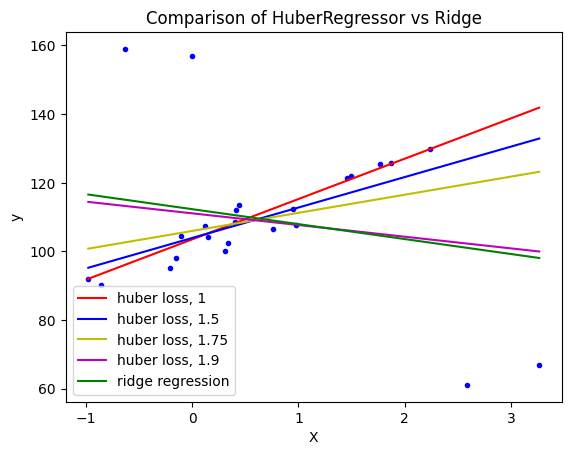

In [1]:
# Authors: Manoj Kumar mks542@nyu.edu
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor, Ridge

# Generate toy data.
rng = np.random.RandomState(0)
X, y = make_regression(
    n_samples=20, n_features=1, random_state=0, noise=4.0, bias=100.0
)

# Add four strong outliers to the dataset.
X_outliers = rng.normal(0, 0.5, size=(4, 1))
y_outliers = rng.normal(0, 2.0, size=4)
X_outliers[:2, :] += X.max() + X.mean() / 4.0
X_outliers[2:, :] += X.min() - X.mean() / 4.0
y_outliers[:2] += y.min() - y.mean() / 4.0
y_outliers[2:] += y.max() + y.mean() / 4.0
X = np.vstack((X, X_outliers))
y = np.concatenate((y, y_outliers))
plt.plot(X, y, "b.")

# Fit the huber regressor over a series of epsilon values.
colors = ["r-", "b-", "y-", "m-"]

x = np.linspace(X.min(), X.max(), 7)
epsilon_values = [1, 1.5, 1.75, 1.9]
for k, epsilon in enumerate(epsilon_values):
    huber = HuberRegressor(alpha=0.0, epsilon=epsilon)
    huber.fit(X, y)
    coef_ = huber.coef_ * x + huber.intercept_
    plt.plot(x, coef_, colors[k], label=f"huber loss, {epsilon}")

# Fit a ridge regressor to compare it to huber regressor.
ridge = Ridge(alpha=0.0, random_state=0)
ridge.fit(X, y)
coef_ridge = ridge.coef_
coef_ = ridge.coef_ * x + ridge.intercept_
plt.plot(x, coef_, "g-", label="ridge regression")

plt.title("Comparison of HuberRegressor vs Ridge")
plt.xlabel("X")
plt.ylabel("y")
plt.legend(loc=0)
plt.show()